In [1]:
from functools import reduce

# Search all sequences of picking cubes

In [6]:
def check_safety(towers_cubes, n):
    global Allowed_seq_3
    n_tr = 0
    for tower in towers_cubes:
        if len(tower) > 3 and tower[-3:] in Allowed_seq_3[8:]:
            n_tr += 1
    return n_tr >= n

def check_tower(tower_cubes):
    global Allowed_seq_1
    global Allowed_seq_2
    global Allowed_seq_3
    n = len(tower_cubes)
    if n == 1:
        return tower_cubes in Allowed_seq_1
    elif n == 2:
        return tower_cubes in Allowed_seq_2
    elif n < 6:
        return tower_cubes[-3:] in Allowed_seq_3
    else:
        return False

def pick(remain_cubes, n_cubes):
    if n_cubes == 4:
        for i in range(3):
            picked_cubes = [[], [], []]
            picked_cubes[i] = [4]
            yield remain_cubes, picked_cubes, [i]
    elif n_cubes == 1:
        for i in range(len(remain_cubes)):
            for j in range(3):
                picked_cubes = [[], [], []]
                picked_cubes[j] = [remain_cubes[i]]
                yield remain_cubes[:i] + remain_cubes[i + 1:], picked_cubes, [j]
    elif n_cubes == 2:
        for i in range(4):
            picked = [i, (i + 1) % 4]
            if all([(x in remain_cubes) for x in picked]):
                yield list(set(remain_cubes) - set(picked)), [[picked[0]], [picked[1]], []], [0, 1]
                yield list(set(remain_cubes) - set(picked)), [[], [picked[0]], [picked[1]]], [1, 2]
        for i in range(4):
            picked = [i, (i + 2) % 4]
            if all([(x in remain_cubes) for x in picked]):
                yield list(set(remain_cubes) - set(picked)), [[picked[0]], [], [picked[1]]], [0, 2]
    elif n_cubes == 3:
        yield [3], [[0], [1], [2]], [0, 1, 2]
        yield [0], [[1], [2], [3]], [0, 1, 2]
        yield [1], [[2], [3], [0]], [0, 1, 2]
        yield [2], [[3], [0], [1]], [0, 1, 2]
        
        
def get_one(towers_cubes=[[], [], []], picking_seq=[], remain_cubes=[0, 1, 2, 3], n_heap=0, strat=None):
    if n_heap == 3:
        
        yield towers_cubes, picking_seq
    
    elif strat is None:
        yield from get_one(towers_cubes, picking_seq, remain_cubes, n_heap, [3, 4, 1])
        yield from get_one(towers_cubes, picking_seq, remain_cubes, n_heap, [2, 1, 4, 1])
        yield from get_one(towers_cubes, picking_seq, remain_cubes, n_heap, [2, 2, 4])
        yield from get_one(towers_cubes, picking_seq, remain_cubes, n_heap, [1, 2, 4, 1])
        yield from get_one(towers_cubes, picking_seq, remain_cubes, n_heap, [1, 1, 1, 4, 1])
            
    elif strat == []:
        if check_safety(towers_cubes, n_heap + 1):
            yield from get_one(towers_cubes, picking_seq, [0, 1, 2, 3], n_heap + 1)
        
    else:
        for remain_cubes, picked_cubes, towers in pick(remain_cubes, strat[0]):
            new_towers_cubes = [towers_cubes[i] + picked_cubes[i] for i in range(3)]
            if all([check_tower(new_towers_cubes[x]) for x in towers]):
                yield from get_one(new_towers_cubes, picking_seq + [picked_cubes], remain_cubes, n_heap, strat[1:])

In [ ]:
def find_optimal_sequence(self, key):
    # dynamic searching of optimal piking sequence
    seqs = [{((), (), ()): []}, {}, {}, {}]
    for i in range(3):
        for last_picked_cubes, last_seq in seqs[i].items():
            for new_picked_cubes, new_seq in self.pick_one_heap(last_picked_cubes, last_seq):
                if self.check_safety(new_picked_cubes, i + 1):
                    old_value = seqs[i + 1].get(new_picked_cubes)
                    if old_value is None:
                        seqs[i + 1][new_picked_cubes] = new_seq
                    else:
                        seqs[i + 1][new_picked_cubes] = min(new_seq, seqs[i + 1][new_picked_cubes], key=key)
    return min(seqs[3].values(), key=key)

## Search allowed cubes sequences 

In [7]:
plan = [1, 0, 2]

def allowed_cubes_seq(n, plan):
    all_cubes = list(range(5))
    oth = list(set(all_cubes) - set(plan))
    sds = [plan[0], plan[2]]
    cnt = plan[1]

    if n == 1:
        return [
            [oth[0]],
            [oth[1]],
            [sds[0]],
            [sds[1]]
        ]
    if n == 2:
        return [
            [oth[0], sds[0]],
            [oth[1], sds[0]],
            [oth[0], sds[1]],
            [oth[1], sds[1]],
            [oth[0], oth[1]],
            [oth[1], oth[0]],
            [sds[1], cnt],
            [sds[0], cnt]
        ]
    if n == 3:
        return [
            [oth[0], sds[0], cnt],
            [oth[1], sds[0], cnt],
            [oth[0], sds[1], cnt],
            [oth[1], sds[1], cnt],
            [oth[0], oth[1], sds[0]],
            [oth[0], oth[1], sds[1]],
            [oth[1], oth[0], sds[0]],
            [oth[1], oth[0], sds[1]],
            [cnt, sds[0], oth[0]],
            [cnt, sds[0], oth[1]],
            [cnt, sds[1], oth[0]],
            [cnt, sds[1], oth[1]],
            [sds[0], oth[0], oth[1]],
            [sds[1], oth[0], oth[1]],
            [sds[0], oth[1], oth[0]],
            [sds[1], oth[1], oth[0]],
            [sds[1], cnt, sds[0]],
            [sds[0], cnt, sds[1]]
        ]
    else:
        return None
    
def allowed_all_seq(plan):
    global Allowed_seq_1
    global Allowed_seq_2
    global Allowed_seq_3
    Allowed_seq_1 = allowed_cubes_seq(1, plan)
    Allowed_seq_2 = allowed_cubes_seq(2, plan)
    Allowed_seq_3 = allowed_cubes_seq(3, plan)    


In [8]:
allowed_all_seq([0, 1, 2])
# len([x[0] for x in get_one()])
[x[1] for x in get_one()][0]

[[[0], [], []],
 [[1], [], []],
 [[2], [], []],
 [[4], [], []],
 [[3], [], []],
 [[], [0], []],
 [[], [1], []],
 [[], [2], []],
 [[], [4], []],
 [[], [3], []],
 [[], [], [0]],
 [[], [], [1]],
 [[], [], [2]],
 [[], [], [4]],
 [[], [], [3]]]

# Search all picking sequenes for all plans

In [39]:
def permutations(array, n=None, perm = []):
    if n == None:
        n = len(array)
    if n == 0:
        yield perm
    else:
        for i in range(len(array)):
            yield from permutations(array[:i] + array[i + 1:], n - 1, perm + [array[i]])

def all_plans():
    yield from permutations(list(range(5)), 3)

In [40]:
for plan in all_plans():
    allowed_all_seq(plan)
    print("plan =", plan, ", min len =", min([len(x[1]) for x in get_one()]))

ValueError: min() arg is an empty sequence

In [5]:
a = {1:2}
list(a.items())

[(1, 2)]

# Calculating movement time during cubes picking

In [7]:
def picking_places_and_states(picking_seq):
    places = []
    states = []
    for i, pick in enumerate(picking_seq):
        n = sum(map(lambda x: len(x), pick))
        for j, cube in enumerate(pick):
            if cube != []:
                if cube[0] == 4:
                    state = 1
                    place = places[-1]
                elif len(states) != 0 and states[-1] == 1 and n == 1:
                    place = places[-1] = (cube[0] - j - 1) % 4
                    state = 2
                else:
                    place = (cube[0] - j + 1) % 4
                    state = 0
                break
        places.append(place)
        states.append(state)
    return places, states
    

In [8]:
allowed_all_seq([3, 0, 1])
seq = sorted([x[1] for x in get_one()], key = lambda x: len(x))[0]
places, states = picking_places_and_states(seq)
for i in range(len(places)):
    print("sequence ", seq[i], "\t place ", places[i], "state ", states[i])

sequence  [[1], [2], [3]] 	 place  2 state  0
sequence  [[], [4], []] 	 place  3 state  1
sequence  [[0], [], []] 	 place  3 state  2
sequence  [[], [3], [0]] 	 place  3 state  0
sequence  [[], [], [1]] 	 place  0 state  0
sequence  [[], [], [4]] 	 place  3 state  1
sequence  [[], [], [2]] 	 place  3 state  2
sequence  [[3], [0], []] 	 place  0 state  0
sequence  [[], [1], []] 	 place  1 state  0
sequence  [[4], [], []] 	 place  1 state  1
sequence  [[2], [], []] 	 place  1 state  2


In [9]:
def dif_point(x1, x2, n):
    return min((x1 - x2) % n,(x1 - x2) % n)

def rotation_time(places, states, start_points=None):
    if not start_points is None:
        time = dif_point(start_points[0], places[0], 4)
        n_start = 1
    else:
        time = 0
        n_start = 0
    for i in range(len(places)):
        if i != 0 and not (states[i] == 0 and states[i - 1] != 0):
            time += min((places[i] - places[i - 1]) % 4,(places[i - 1] - places[i]) % 4)
        elif i != 0 and states[i] == 0 and states[i - 1] != 0 and not start_points is None:
            time += dif_point(start_points[n_start], places[i], 4)
            n_start += 1
    return time

def move_time(places, states):
    time = 0
    for i in range(len(places)):
        if i != 0 and (states[i] == 1 and states[i - 1] == 0 or states[i] == 2 and states[i - 1] == 1):
            time += 1
    return time

In [10]:
print("rotation time ", rotation_time(places, states), "move time ", move_time(places, states))

rotation time  4 move time  6


## Start points

In [11]:
# start_points = [3, 2, 3]
start_points = [2, 3, 0]

# Choosing the most effective picking sequence

## Rotate time with start points

In [12]:
time = lambda x: rotation_time(*picking_places_and_states(x), start_points=start_points)
for plan in all_plans():
    allowed_all_seq(plan)
    seqs = [x[1] for x in get_one()]
    print("plan =", plan, "min rotate time =", time(min(seqs, key = time)),
          "max rotate time =", time(max(seqs, key = time)))

plan = [0, 1, 2] min rotate time = 5 max rotate time = 16
plan = [0, 1, 3] min rotate time = 4 max rotate time = 17
plan = [0, 1, 4] min rotate time = 2 max rotate time = 17
plan = [0, 2, 1] min rotate time = 5 max rotate time = 17
plan = [0, 2, 3] min rotate time = 5 max rotate time = 17
plan = [0, 2, 4] min rotate time = 5 max rotate time = 19
plan = [0, 3, 1] min rotate time = 4 max rotate time = 18
plan = [0, 3, 2] min rotate time = 6 max rotate time = 14
plan = [0, 3, 4] min rotate time = 4 max rotate time = 17
plan = [0, 4, 1] min rotate time = 3 max rotate time = 18
plan = [0, 4, 2] min rotate time = 3 max rotate time = 18
plan = [0, 4, 3] min rotate time = 5 max rotate time = 18
plan = [1, 0, 2] min rotate time = 1 max rotate time = 15
plan = [1, 0, 3] min rotate time = 4 max rotate time = 15
plan = [1, 0, 4] min rotate time = 3 max rotate time = 17
plan = [1, 2, 0] min rotate time = 5 max rotate time = 17
plan = [1, 2, 3] min rotate time = 5 max rotate time = 15
plan = [1, 2, 

In [13]:
allowed_all_seq([4, 2, 0])
seqs = [x[1] for x in get_one()]
seq = min(seqs, key = time)
places, states = picking_places_and_states(seq)
for i in range(len(places)):
    print("sequence ", seq[i], "\t place ", places[i], "state ", states[i])
    
print(time(seq))

sequence  [[1], [], [3]] 	 place  2 state  0
sequence  [[0], [], []] 	 place  1 state  0
sequence  [[], [], [4]] 	 place  3 state  1
sequence  [[], [], [2]] 	 place  3 state  2
sequence  [[2], [3], [0]] 	 place  3 state  0
sequence  [[4], [], []] 	 place  3 state  1
sequence  [[], [1], []] 	 place  3 state  2
sequence  [[], [0], [1]] 	 place  0 state  0
sequence  [[], [2], []] 	 place  2 state  0
sequence  [[], [4], []] 	 place  2 state  1
sequence  [[3], [], []] 	 place  2 state  2
5


## Linear combination of rotate time, picking number and move forward time

In [14]:
def general_time(seq, k_r=1, k_m=1, k_p=1, start_points=None):
    places, states = picking_places_and_states(seq)
    t_r = rotation_time(places, states, start_points)
    t_m = move_time(places, states)
    t_p = len(seq)
    return t_r * k_r + t_m * k_m + t_p * k_p

In [50]:
operation_times = []
k_r = 3
k_m = 2
k_p = 2
time = lambda x: general_time(x, k_r, k_m, k_p, start_points)
for plan in all_plans():
    allowed_all_seq(plan)
    seqs = [x[1] for x in get_one()]
    operation_times.append(time(min(seqs, key=time)))
    print("plan =", plan, "min time =", time(min(seqs, key=time)),
          "max time =", time(max(seqs, key=time)))

plan = [0, 1, 2] min time = 59 max time = 102
plan = [0, 1, 3] min time = 59 max time = 111
plan = [0, 1, 4] min time = 47 max time = 108
plan = [0, 2, 1] min time = 59 max time = 111
plan = [0, 2, 3] min time = 53 max time = 111
plan = [0, 2, 4] min time = 58 max time = 117
plan = [0, 3, 1] min time = 59 max time = 111
plan = [0, 3, 2] min time = 61 max time = 102
plan = [0, 3, 4] min time = 47 max time = 111
plan = [0, 4, 1] min time = 49 max time = 114
plan = [0, 4, 2] min time = 43 max time = 111
plan = [0, 4, 3] min time = 54 max time = 114
plan = [1, 0, 2] min time = 56 max time = 111
plan = [1, 0, 3] min time = 56 max time = 102
plan = [1, 0, 4] min time = 51 max time = 108
plan = [1, 2, 0] min time = 59 max time = 111
plan = [1, 2, 3] min time = 59 max time = 102
plan = [1, 2, 4] min time = 51 max time = 111
plan = [1, 3, 0] min time = 59 max time = 111
plan = [1, 3, 2] min time = 61 max time = 111
plan = [1, 3, 4] min time = 62 max time = 117
plan = [1, 4, 0] min time = 49 max

In [49]:
allowed_all_seq([0, 1, 2])
seqs = [x[1] for x in get_one()]
time = lambda x: general_time(x, 0, 0, 1, start_points)
seq = min(seqs, key=time)
for i in seq:
    print(i)
print("time = ", time(seq))

[[0], [], []]
[[1], [], []]
[[2], [], []]
[[4], [], []]
[[], [3], []]
[[], [2], [3]]
[[], [1], []]
[[], [], [4]]
[[], [0], []]
[[], [], [0]]
[[3], [], [1]]
[[], [4], []]
[[], [], [2]]
time =  13


In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

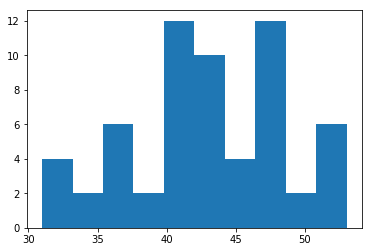

In [17]:
plt.hist(operation_times);

In [18]:
sum(operation_times) / len(operation_times)

42.8

# Simple picking

In [19]:
def simple_pick(remain_cubes, n_cubes):
    if n_cubes == 4:
        yield remain_cubes, [4]
    elif n_cubes == 1:
        for i in range(len(remain_cubes)):
            yield remain_cubes[:i] + remain_cubes[i + 1:], [remain_cubes[i]]

def simple_get_one_cube(tower_cubes=[], picking_seq=[], remain_cubes=[], strat=None):
    if strat==None:
        yield from simple_get_one_cube(tower_cubes, picking_seq, [0, 1, 2, 3], [1, 1, 1, 1, 4])
        yield from simple_get_one_cube(tower_cubes, picking_seq, [0, 1, 2, 3], [1, 1, 1, 4, 1])
    elif len(strat) > 0:
        for remain_cubes, picked_cubes in simple_pick(remain_cubes, strat[0]):
            new_tower_cubes = tower_cubes + picked_cubes
            if check_tower(new_tower_cubes):
                yield from simple_get_one_cube(new_tower_cubes, picking_seq + picked_cubes, remain_cubes, strat[1:])
    elif strat == []:
        yield tower_cubes, picking_seq
    
    

In [20]:
for plan in all_plans():
    allowed_all_seq(plan)
    print("plan =", plan, [x[1] for x in simple_get_one_cube()][0])

plan = [0, 1, 2] [0, 1, 2, 3, 4]
plan = [0, 1, 3] [0, 1, 3, 2, 4]
plan = [0, 1, 4] [2, 3, 0, 1, 4]
plan = [0, 2, 1] [0, 2, 1, 3, 4]
plan = [0, 2, 3] [0, 2, 3, 1, 4]
plan = [0, 2, 4] [1, 3, 0, 2, 4]
plan = [0, 3, 1] [0, 3, 1, 2, 4]
plan = [0, 3, 2] [0, 3, 2, 1, 4]
plan = [0, 3, 4] [1, 2, 0, 3, 4]
plan = [0, 4, 1] [2, 3, 0, 4, 1]
plan = [0, 4, 2] [1, 3, 0, 4, 2]
plan = [0, 4, 3] [1, 2, 0, 4, 3]
plan = [1, 0, 2] [1, 0, 2, 3, 4]
plan = [1, 0, 3] [1, 0, 3, 2, 4]
plan = [1, 0, 4] [2, 3, 1, 0, 4]
plan = [1, 2, 0] [0, 2, 1, 3, 4]
plan = [1, 2, 3] [0, 1, 2, 3, 4]
plan = [1, 2, 4] [0, 3, 1, 2, 4]
plan = [1, 3, 0] [0, 3, 1, 2, 4]
plan = [1, 3, 2] [0, 1, 3, 2, 4]
plan = [1, 3, 4] [0, 2, 1, 3, 4]
plan = [1, 4, 0] [2, 3, 0, 4, 1]
plan = [1, 4, 2] [0, 3, 1, 4, 2]
plan = [1, 4, 3] [0, 2, 1, 4, 3]
plan = [2, 0, 1] [1, 0, 2, 3, 4]
plan = [2, 0, 3] [1, 2, 0, 3, 4]
plan = [2, 0, 4] [1, 3, 2, 0, 4]
plan = [2, 1, 0] [0, 1, 2, 3, 4]
plan = [2, 1, 3] [0, 2, 1, 3, 4]
plan = [2, 1, 4] [0, 3, 2, 1, 4]
plan = [2,

In [21]:
def simple_picking_places_and_states(picking_seq):
    places = []
    states = []
    for i, pick in enumerate(picking_seq):
        cube = pick
        if cube == 4:
            state = 1
            place = places[-1]
        elif len(states) != 0 and states[-1] == 1:
            place = places[-1] = (cube - 2) % 4
            state = 2
        else:
            place = (cube) % 4
            state = 0
        places.append(place)
        states.append(state)
    return places, states

def simple_rotation_time(places, states, start_point=None):
    if start_point is None:
        time = 0
    else:
        time = dif_point(start_point, places[0], 4)
    for i in range(1, len(places)):
        time += min((places[i] - places[i - 1]) % 4,(places[i - 1] - places[i]) % 4)
    return time

def simple_move_time(places, states):
    time = 0
    for i in range(len(places)):
        if i != 0 and (states[i] == 1 and states[i - 1] == 0 or states[i] == 2 and states[i - 1] == 1):
            time += 1
    return time

def simple_time(seq, k_r=1, k_m=1, k_p=1, start_point=None):
    time = 0
    places, states = simple_picking_places_and_states(seq)
    t_r = simple_rotation_time(places, states, start_point)
    t_m = simple_move_time(places, states)
    t_p = len(seq)
    time += t_r * k_r + t_m * k_m + t_p * k_p
    return time

In [22]:
allowed_all_seq([1, 0, 2])
seq = sorted([x[1] for x in simple_get_one_cube()], key = lambda x: len(x))[0]
places, states = simple_picking_places_and_states(seq)
for i in range(len(places)):
    print("sequence ", seq[i], "\t place ", places[i], "state ", states[i])
print(simple_time(seq))

sequence  1 	 place  1 state  0
sequence  0 	 place  0 state  0
sequence  2 	 place  2 state  0
sequence  3 	 place  3 state  0
sequence  4 	 place  3 state  1
10


In [23]:
operation_times = []
operation_times = []
k_r = 2
k_m = 2
k_p = 2
for plan in all_plans():
    allowed_all_seq(plan)
    seqs = [x[1] for x in simple_get_one_cube()]
    min_time = 0
    max_time = 0
    for start_point in start_points:
        time = lambda x: simple_time(x, k_r, k_m, k_p, start_point) 
        min_time += time(min(seqs, key=time))
        max_time += time(max(seqs, key=time))
        
    operation_times.append(min_time)
    print("plan =", plan, "min time =", min_time, "max time =", max_time)

plan = [0, 1, 2] min time = 54 max time = 74
plan = [0, 1, 3] min time = 60 max time = 82
plan = [0, 1, 4] min time = 60 max time = 72
plan = [0, 2, 1] min time = 62 max time = 84
plan = [0, 2, 3] min time = 62 max time = 84
plan = [0, 2, 4] min time = 70 max time = 82
plan = [0, 3, 1] min time = 62 max time = 82
plan = [0, 3, 2] min time = 56 max time = 74
plan = [0, 3, 4] min time = 60 max time = 72
plan = [0, 4, 1] min time = 62 max time = 78
plan = [0, 4, 2] min time = 64 max time = 76
plan = [0, 4, 3] min time = 66 max time = 78
plan = [1, 0, 2] min time = 62 max time = 82
plan = [1, 0, 3] min time = 56 max time = 76
plan = [1, 0, 4] min time = 58 max time = 72
plan = [1, 2, 0] min time = 62 max time = 84
plan = [1, 2, 3] min time = 56 max time = 76
plan = [1, 2, 4] min time = 62 max time = 74
plan = [1, 3, 0] min time = 62 max time = 82
plan = [1, 3, 2] min time = 62 max time = 82
plan = [1, 3, 4] min time = 68 max time = 80
plan = [1, 4, 0] min time = 62 max time = 78
plan = [1,

# Library of trajectory sequence

In [8]:
# %load test.py
from cubesequence import *

optimizer = CubePickingOptimizer()
optimizer.set_plan([2, 4, 3])
time = optimizer.get_fun_time(k_r=1, k_m=2, k_p=2)
seq = optimizer.find_optimal_sequence(time)
for s in seq:
    print(s)
print(time(seq))


[[0], [1], []]
[[3], [], []]
[[4], [], []]
[[2], [], []]
[[], [3], [0]]
[[], [], [1]]
[[], [4], []]
[[], [2], []]
[[0], [1], [2]]
[[], [], [4]]
[[], [], [3]]
38


In [11]:
n = 0
for i in range(len(seq)):
    for j in range(3):
        if seq[i][j]:
            print(n, j, seq[i][j][0])
            n += 1

0 0 0
1 1 1
2 0 3
3 0 4
4 0 2
5 1 3
6 2 0
7 2 1
8 1 4
9 1 2
10 0 0
11 1 1
12 2 2
13 2 4
14 2 3
